<a href="https://colab.research.google.com/github/esis-a-i/Python-Analytic-Adv-HSE/blob/main/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9_%D1%82%D0%B5%D1%81%D1%82%2C_%D0%98%D0%98%2C_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Часть 1. Парсинг (10 баллов)

Мы предлагаем вам распарсить часть данных litres.ru — а именно часть про книги, имеющие отношение к программированию.

Они находятся в этом каталоге: https://www.litres.ru/genre/programmirovanie-5272/

Вам нужно собрать датасет о книгах с первых 40-ти страниц каталога (около 960 книг.)
*Подсказка.* Можете начать с исследования html кода этой страницы.

Вам необходимо собрать датасет, содержащий следующие данные:
* name: название книги
* author: автор
* link: ссылка на книгу
* rating: рейтинг по 5-балльной шкале
* rating_count: количество оценок
* review_count: количество отзывов
* pages_count: объем (число страниц)
* price: цена
* text_reviews: тексты отзывов: список строк
* age: возрастное ограничение
* year: год написания

В дальнейшем вам нужно будет анализировать полученный у вас датасет.

Если у вас не получилось спарсить датасет, воспользуйтесь для последующих пунктов готовым датасетом: https://disk.yandex.ru/d/2UZet2-qxRxF6Q

 Так вы сможете получить баллы за вторую часть.

(Датасет неидеален, с ним придется поработать!)

**Парсите "вежливо": используйте time.sleep() не меньше 1-2 секунд между запросами к сайту!**

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import time
import re
import numpy as np

In [ ]:
litres_url = 'https://www.litres.ru'
books_url = '/genre/programmirovanie-5272/'
HEADERS = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
}
request = requests.get(litres_url + books_url, headers=HEADERS)
soup = BeautifulSoup(request.text, 'html.parser')

In [ ]:
book_url = 'book/martin-kleppman-1733/vysokonagruzhennye-prilozheniya-programmirovanie-mass-39100996/'
response = requests.get(litres_url + book_url)
soup = BeautifulSoup(response.text, 'html.parser')

In [ ]:
# name: название книги
# author: автор
# link: ссылка на книгу
# rating: рейтинг по 5-балльной шкале
# rating_count: количество оценок
# review_count: количество отзывов
# pages_count: объем (число страниц)
# price: цена
# text_reviews: тексты отзывов: список строк
# age: возрастное ограничение
# year: год написания

name = soup.select_one('[class^="BookCard_book__mainInfo__title___"]').text
author = soup.select_one('[class^="BookAuthor_author__info__"]').text
rating_section = soup.select_one('[class^="BookFactoids_section__"]')
if rating_section:
  rating = rating_section.select_one('meta[itemprop="ratingValue"]').get('content', '0.0')
  rating_count = rating_section.select_one('meta[itemprop="ratingCount"]').get('content', '0')
else:
  rating = '0.0'
  rating_count = '0'

review_count = soup.select_one('[class^="BookFactoids_primary__"]').text
book_data_section = soup.select_one('[class^="BookCard_book__preview__data__"]')
pages_count = book_data_section.select('p')[0].text.replace('Объем', '').replace('страниц', '').strip()
year = book_data_section.select('p')[1].text.replace('год', '').strip()
age = book_data_section.select('p')[2].text.strip()
price = soup.select_one('[class^="SaleBlock_block__price__"]').text
reviews_url = soup.select_one('[class^="CommentSystem_commentsTitleBlock__"]').select_one('a')['href']

'/book/martin-kleppman-1733/vysokonagruzhennye-prilozheniya-programmirovanie-mass-39100996/otzivi/'

In [ ]:
reviews_url = '/book/martin-kleppman-1733/vysokonagruzhennye-prilozheniya-programmirovanie-mass-39100996/otzivi/'
response = requests.get(litres_url + reviews_url)
soup = BeautifulSoup(response.text, 'html.parser')

In [ ]:
for comment in soup.select_one('[class^="AllComments_comments__"]'):
  comment_review = comment.select_one('[class^="Comment_reviewText__"]')
  if comment_review is not None:
        print(comment_review.text)

Не могу что-либо про перевод сказать, читал данную книгу в оригинале. Очень толково и по делу описаны базы данных и интерфейсы. С другой же стороны – половину книги можно вырезать без какой либо потери в качестве и содержании…
Altmann Nicolas, hello world
Книга претендует на звание «must read» для разработчика отказоустойчивых систем. Представляет собой в первую очередь и в большей мере учебник, нежели справочник. Книга в полной мере раскрывает принципы функционирования самых разных баз данных. Но это далеко не всё, в книге описаны подходы и общие принципы к решению проблем отказов узлов в распределенных системах, выходящие за границы области баз данных. В русскоязычных сообществах книга зовется «кабанчик» и стала классикой в области разработки и проектирования распределенных отказоустойчивых решений. Отмечу высокий порог вхождения для некоторых деталей книги, в том числе B-деревья, алгоритмы консенсуса, и другие математические моменты.
Отличная книга, раскрывающая внутреннее устройств

In [ ]:
def parse_book_page(book_url):
    response = requests.get(litres_url + book_url, headers=HEADERS)
    soup = BeautifulSoup(response.text, 'html.parser')

    name = soup.select_one('[class^="BookCard_book__mainInfo__title___"]').text if soup.select_one('[class^="BookCard_book__mainInfo__title___"]') else None
    author = soup.select_one('[class^="BookAuthor_author__info__"]').text if soup.select_one('[class^="BookAuthor_author__info__"]') else None
    rating_section = soup.select_one('[class^="BookFactoids_section__"]')
    if rating_section:
        rating = rating_section.select_one('meta[itemprop="ratingValue"]').get('content', '0.0')
        rating_count = rating_section.select_one('meta[itemprop="ratingCount"]').get('content', '0')
    else:
        rating = '0.0'
        rating_count = '0'

    review_count = int(re.findall(r'\d+', soup.select_one('[class^="BookFactoids_primary__"]').text)[0]) if soup.select_one('[class^="BookFactoids_primary__"]') else None

    book_data_section = soup.select_one('[class^="BookCard_book__preview__data__"]')
    if book_data_section:
        pages_count = book_data_section.select('p')[0].text.replace('Объем', '').replace('страниц', '').strip()
        year = book_data_section.select('p')[1].text.replace('год', '').strip()
        age = book_data_section.select('p')[2].text.strip() if len(book_data_section.select('p')) > 2 else None
    else:
        pages_count = None
        year = None
        age = None

    price = int(re.findall(r'\d+', soup.select_one('[class^="SaleBlock_block__price__"]').text)[0]) if soup.select_one('[class^="SaleBlock_block__price__"]') else None

    text_reviews = []
    if soup.select_one('[class^="AllComments_comments__"]') and soup.select_one('[class^="AllComments_comments__"]').select('[class^="Comment_reviewText__"]'):
      for comment in soup.select_one('[class^="AllComments_comments__"]').select('[class^="Comment_reviewText__"]'):
          if comment:
              text_reviews.append(comment.text.strip())

    return {
        'name': name,
        'author': author,
        'link': litres_url + book_url,
        'rating': rating,
        'rating_count': rating_count,
        'review_count': review_count,
        'pages_count': pages_count,
        'price': price,
        'year': year,
        'age': age,
        'text_reviews': text_reviews
    }

In [ ]:
books = list()
for page in range(40):
  request = requests.get(f'{litres_url}{books_url}', headers=HEADERS, params={"page": page})
  soup = BeautifulSoup(request.text, 'html.parser')
  for book in soup.select('[class^="ArtDefault_wrapper__"]'):
          # Ищем внутри элемент a и извлекаем ссылку
          book_link_tag = book.select_one('a')
          if book_link_tag:
              book_url = book_link_tag['href']
              print(book_url)
              try:
                book_data = parse_book_page(book_url)
                books.append(book_data)
              except Exception:
                pass
              time.sleep(2)

/book/vlad-hononov/izuchaem-ddd-predmetno-orientirovannoe-proektirovanie-70920895/
/book/martin-kleppman-1733/vysokonagruzhennye-prilozheniya-programmirovanie-mass-39100996/
/book/aleks-suy/system-design-podgotovka-k-slozhnomu-intervu-67193183/
/book/toni-geddis-32491161/nachinaem-programmirovat-na-python-68998912/
/book/dzheyd-karter/neyroseti-nachalo-69188950/
/book/dzheyd-karter/python-biblioteki-70323379/
/book/anna-bosova/informatika-7-klass-68294027/
/book/robert-s-martin/chistyy-kod-sozdanie-analiz-i-refaktoring-pdf-epub-6444478/
/book/endru-tanenbaum/arhitektura-komputera-66738078/
/book/pol-deytel/c-20-dlya-programmistov-pdf-epub-70870268/
/book/e-u-hrustaleva/1s-predpriyatie-8-3-prakticheskoe-posobie-razrabotchika-pri-40932461/
/book/dzhon-bodner/go-idiomy-i-patterny-proektirovaniya-pdf-epub-67893687/
/book/e-u-hrustaleva/razrabotka-slozhnyh-otchetov-v-1s-predpriyatii-8-sistema-ko-70927897/
/book/dzheyd-karter/sozday-svoy-vpn-bezopasnoe-ispolzovanie-interneta-70388320/
/book/

In [ ]:
books_df = pd.DataFrame(books)

## Часть 2. EDA (30 баллов)

1. Выведите первые 5 строк датасета. (0.25). Сколько в нём строк и столбцов (0.25)?
2. Есть ли в датасете пропуски? (0.5)
3. Проверьте типы данных. Если это необходимо, приведите к типам int и float те столбцы, с которыми понадобится работать как с числами. (1).
4. Выведите описательные статистики переменных. Ответьте на следующие вопросы:

* Какая медианная цена книги в вашем датасете? (1)  
* Какое возрастное ограничение встречается чаще всего? (1)  
* Какое среднее число отзывов в книге? (1)  
* Сколько книг имеют оценку ниже 4.25? (1)  
* В каком году было написано больше всего книг из датасета? (1)  

5. Если вы работаете с готовым датасетом, то попробуйте "достать" из столбца pages количество страниц. Если у вас не получилось, то далее при определении числа страниц пользуйтесь стольцов pages_count. Если вы парсили датасет сами, то вы получаете балл за этот пункт автоматически (1.5)

6. Создайте новое поле is_popular. Значение равно 1, если рейтинг книги не менее 4.6 и при этом у нее не менее 5 отзывов, и 0 в остальных случаях. (1)

7. Как отличается среднее число страниц среди популярных и непопулярных книг? (2)

8. Выведите топ-10 книг по числу отзывов. (2).

9. Найдите среднюю длину отзыва (в символах). (2)

10. Постройте таблицу корреляций числовых переменных. (1) Прокомментируйте результаты. (1)

11. Постройте диаграмму рассеяния (scatterplot) количества страниц и количества отзывов. Не забудьте подписать график и оси. (1) Прокомментируйте полученные результаты. (1)

12. Постройте линейный график: по оси Х год, по оси Y количество книг. (1) Прокомментируйте. (1)

12. Постройте еще любые два графика по вашему усмотрению. (2) Прокомментируйте полученные результаты. (1.5)

13. Постройте таблицу с авторами книг с именем автора, количество книг в датасете, средней оценкой книг, средним количеством отзывов. (2).

14. Что еще интересного можно увидеть в этом датасете? Просмотрите на данные и ответьте на какие-нибудь вопросы, на которые не ответили в предыдущим пункте. Мы никак не ограничиваем вашу фантазию! (3).

In [ ]:
books_df.head(5)

,name,author,link,rating,rating_count,review_count,pages_count,price,year,age,text_reviews
0,Изучаем DDD – предметно-ориентированное проект...,None,https://www.litres.ru/book/vlad-hononov/izucha...,0.0,0,1,319,399.0,2022,0+,"[Обязательно вернусь, но позжеЭта книга из той..."
1,Высоконагруженные приложения. Программирование...,None,https://www.litres.ru/book/martin-kleppman-173...,4.0,51,11,640,799.0,2017,16+,"[Не могу что-либо про перевод сказать, читал д..."
2,System Design. Подготовка к сложному интервью,Алекс Сюй,https://www.litres.ru/book/aleks-suy/system-de...,3.6,17,9,304 ы,399.0,2020,16+,[Добротная книга по разработке архитектуры при...
3,Начинаем программировать на Python,None,https://www.litres.ru/book/toni-geddis-3249116...,5.0,16,6,875,399.0,2021,12+,[Шикарная книга! Начал изучать Python самостоя...
4,Нейросети начало,None,https://www.litres.ru/book/dzheyd-karter/neyro...,4.9,440,5,102 ы,399.0,2023,12+,[Книга отличная. Давно хотела понять как все р...


In [ ]:
print(books_df.shape[0], books_df.shape[1])

925 11


In [ ]:
books_df.isnull().sum()

,0
name,0
author,468
link,0
rating,0
rating_count,0
review_count,0
pages_count,0
price,23
year,0
age,43


In [ ]:
books_df.dtypes

,0
name,object
author,object
link,object
rating,object
rating_count,object
review_count,int64
pages_count,object
price,float64
year,object
age,object


In [ ]:
books_df.head()

,name,author,link,rating,rating_count,review_count,pages_count,price,year,age,text_reviews
0,Изучаем DDD – предметно-ориентированное проект...,None,https://www.litres.ru/book/vlad-hononov/izucha...,0.0,0,1,319,399.0,2022,0+,"[Обязательно вернусь, но позжеЭта книга из той..."
1,Высоконагруженные приложения. Программирование...,None,https://www.litres.ru/book/martin-kleppman-173...,4.0,51,11,640,799.0,2017,16+,"[Не могу что-либо про перевод сказать, читал д..."
2,System Design. Подготовка к сложному интервью,Алекс Сюй,https://www.litres.ru/book/aleks-suy/system-de...,3.6,17,9,304 ы,399.0,2020,16+,[Добротная книга по разработке архитектуры при...
3,Начинаем программировать на Python,None,https://www.litres.ru/book/toni-geddis-3249116...,5.0,16,6,875,399.0,2021,12+,[Шикарная книга! Начал изучать Python самостоя...
4,Нейросети начало,None,https://www.litres.ru/book/dzheyd-karter/neyro...,4.9,440,5,102 ы,399.0,2023,12+,[Книга отличная. Давно хотела понять как все р...


In [ ]:
books_df['rating'] = books_df['rating'].astype(float)
books_df['rating_count'] = books_df['rating_count'].astype(int)
books_df['review_count'] = books_df['review_count'].astype(int)
books_df['pages_count'] =  books_df['pages_count'].apply(lambda x: int(re.findall(r'\d+', x)[0])).astype(int)
books_df['year'] = books_df['year'].apply(lambda x: int(re.findall(r'\d+', x)[0])).astype(int)
books_df['age'] = books_df['age'].apply(lambda x: float(x.replace('+', '')) if x is not None else None).astype(float)
books_df['text_reviews'] = books_df['text_reviews']
books_df['author'] = books_df['author'].astype(str)
books_df['name'] = books_df['name'].astype(str)
books_df['link'] = books_df['link'].astype(str)

In [ ]:
books_df.describe()

,rating,rating_count,review_count,pages_count,price,year,age
count,925.000000,925.000000,925.000000,925.000000,902.000000,925.000000,882.000000
mean,3.047892,14.977297,2.038919,248.380541,310.506652,1923.566486,6.285714
std,2.069927,42.184409,3.203184,240.355878,201.817066,424.233897,6.910487
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,15.000000,119.000000,2012.000000,0.000000
50%,4.000000,3.000000,1.000000,209.000000,349.000000,2018.000000,0.000000
75%,4.800000,11.000000,3.000000,393.000000,399.000000,2022.000000,12.000000
max,5.000000,440.000000,28.000000,1223.000000,990.000000,2024.000000,18.000000


In [ ]:
books_df['price'].median()

349.0

In [ ]:
books_df['age'].mode().values[0]

0.0

In [ ]:
books_df['review_count'].mean()

2.038918918918919

In [ ]:
len(books_df[books_df['rating'] < 4.25])

525

In [ ]:
books_df['year'].mode().values[0]

2023

In [ ]:
books_df['is_popular'] =((books_df['rating'] >= 4.6) & (books_df['review_count'] >= 5)).astype(int)
books_df['is_popular']

,is_popular
0,0
1,0
2,0
3,1
4,1
...,...
920,0
921,0
922,0
923,0


In [ ]:
books_df[books_df['is_popular'] == 1]['pages_count'].mean()

337.7560975609756

In [ ]:
books_df[books_df['is_popular'] == 0]['pages_count'].mean()

244.23529411764707

In [ ]:
books_df.sort_values('review_count', ascending=False).head(10)

,name,author,link,rating,rating_count,review_count,pages_count,price,year,age,text_reviews,is_popular
124,Теоретический минимум по Computer Science. Все...,Владстон Феррейра Фило,https://www.litres.ru/book/vladston-ferreyra-f...,3.9,94,28,224,399.0,2017,16.0,[Прекрасная книга. Рекомендовал и старшим школ...,0
150,#Сам себе программист. Как научиться программи...,Кори Альтхофф,https://www.litres.ru/book/kori-althoff/sam-se...,4.2,128,25,210,299.0,2017,12.0,"[Отличная книга чтобы начать программировать, ...",0
229,Сделай видеоигру один и не свихнись,None,https://www.litres.ru/audiobook/slava-gris/sde...,4.9,73,24,6,529.0,2023,12.0,"[Начну со слов ""Слава - моё почтение"".Вначале ...",1
112,Нейросети. Обработка естественного языка,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/neyro...,5.0,378,19,231,399.0,2023,12.0,[Отличная серия! Обложки просто кайф. Много пр...,1
7,"Чистый код: создание, анализ и рефакторинг (pd...",Роберт Мартин,https://www.litres.ru/book/robert-s-martin/chi...,4.3,121,19,464,399.0,16,NaN,"[Прекрасная книгаНесмотря на то, что некоторые...",0
240,"Изучаем Python: программирование игр, визуализ...",Эрик Мэтиз,https://www.litres.ru/book/erik-metiz/izuchaem...,4.3,74,18,512,399.0,2021,16.0,"[Осторожно, под видом второго издания продаетс...",0
536,"Swift. Основы разработки приложений под iOS, i...",None,https://www.litres.ru/book/vasiliy-usov/swift-...,3.1,64,17,545,499.0,2021,16.0,[Книга хорошая. Все подробно описано. Единстве...,0
441,Путь лидера,None,https://www.litres.ru/book/anna-kozlovceva/put...,5.0,174,17,215,199.0,2023,12.0,[Отличное руководство. Расписан каждый шаг. Да...,1
248,Облачные технологии. Практическое руководство ...,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/oblac...,5.0,269,17,212,399.0,2024,12.0,[Автор не перестает радовать годными книгами. ...,1
160,Программирование на C++ в примерах и задачах,None,https://www.litres.ru/book/aleksey-nikolaevich...,4.0,78,16,369,419.0,2017,12.0,"[Я купил эту книгу в бумажном виде, прочитав с...",0


In [ ]:
books_df['text_reviews'].apply(lambda x: np.mean([len(i) for i in x])).mean()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



355.7680278791281

In [ ]:
books_df.select_dtypes(include='number').corr()

,rating,rating_count,review_count,pages_count,price,year,age,is_popular
rating,1.000000,0.247833,0.377539,0.393590,0.364506,-0.101985,0.410673,0.189755
rating_count,0.247833,1.000000,0.535548,0.090344,0.141559,-0.019258,0.204716,0.519261
review_count,0.377539,0.535548,1.000000,0.292291,0.240498,-0.050083,0.312745,0.384592
pages_count,0.393590,0.090344,0.292291,1.000000,0.408487,-0.156758,0.276319,0.080124
price,0.364506,0.141559,0.240498,0.408487,1.000000,0.009991,0.468543,0.097285
year,-0.101985,-0.019258,-0.050083,-0.156758,0.009991,1.000000,0.481356,0.024786
age,0.410673,0.204716,0.312745,0.276319,0.468543,0.481356,1.000000,0.126683
is_popular,0.189755,0.519261,0.384592,0.080124,0.097285,0.024786,0.126683,1.000000


In [ ]:
import plotly.express as px

In [ ]:
books_df['num_reviews'] = books_df['text_reviews'].apply(len)
px.scatter(books_df, y='pages_count', x='num_reviews')

<Axes: xlabel='year'>

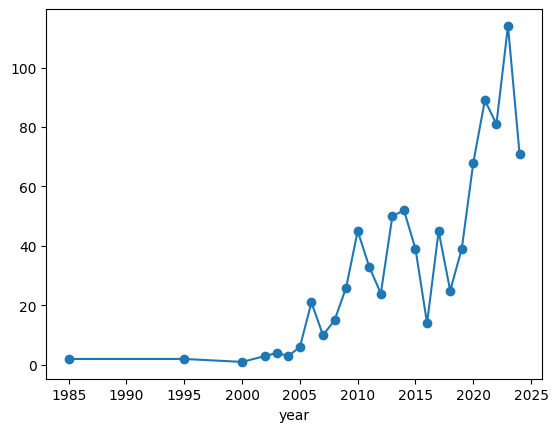

In [ ]:
books_year = books_df[books_df['year'] > 1800]['year'].value_counts().sort_index()
books_year.plot(kind='line', marker='o')

In [ ]:
books_df['rating'] = books_df['rating'].apply(lambda x: x if x > 0 else 0)
px.histogram(books_df, x='rating', nbins=5)

In [ ]:
px.pie(books_df, 'year')